# Bellabeat Case Study with R  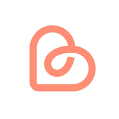
*Author: Alexandra Elizabeth Mora Jara*

*2023*


**Table of Contents**

* [SUMMARY](#titulo1)
    * [Bellabeat's products](#subsection1)
    * [Business task](#subsection2)
    * [Questions for the analysis](#subsection3)

* [About the Dataset](#titulo2)

* [Data Processing](#titulo3)
    * [Files used in the analysis](#subsection4)
    * [Installation of packages and importing the libraries ](#subsection5)
    * [Importing Datasets](#subsection6)
    * [Data analysis ](#subsection7)
    * [Data verification](#subsection8)
    * [Data Cleaning](#subsection9)
    
* [Data analysis](#titulo4)
    * [Data trends ](#subsection10)
    * [Visualization](#subsection11)
    
* [Conclusion and next steps](#titulo5)


# SUMMARY  <a class="anchor"  id="titulo1"></a>
Bellabeat is a company founded in 2013 by Urška Sršen and Sandro Mur dedicated to developing devices and products whose function is to monitor women's biometric and lifestyle data in order to help them to understand their body's functioning and improve their health.

More information about the company can be found at the following link https://bellabeat.com [20-02-2023]. 


## Bellabeat's products <a class="anchor"  id="subsection1"></a>
* **Bellabeat app**: The Bellabeat app provides users with health data related to their activity, sleep, stress, menstrual cycle, and mindfulness habits. 
* **Leaf**: Bellabeat’s classic wellness tracker can be worn as a bracelet, necklace, or clip to track user activity, sleep, and stress.
* **Time**: This wellness watch combines the timeless look of a classic timepiece with smart technology to track user activity, sleep, and stress.
* **Spring**: EThis is a water bottle that tracks daily water intake using smart technology to ensure that you are appropriately hydrated throughout the day.

Additionally, Bellabeat also offers users a **membership programme** by subscription.Membership gives users 24/7 access to fully personalized guidance on nutrition, activity, sleep, health and beauty, and mindfulness based on their lifestyle and goals.

## Business task <a class="anchor"  id="subsection2"></a>
Our main objective is to analyse the use of smart devices similar to Bellabeat to identify possible consumer trends in order to develop a marketing strategy for Bellabeat's products.

The stakeholders in our analysis are the company's founder and co-founder, and Bellabeat's marketing data computational analysis team.

## Questions for the analysis <a class="anchor"  id="subsection3"></a>
1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

# About the Dataset  <a class="anchor"  id="titulo2"></a>

The data used for this analysis comes from Kaggle: [FitBit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit).The user of the database is MÖBIUS. This user explains that this dataset contains data from a survey distributed via Amazon Mechanical Turk between 12.03.2016 and 12.05.2016. This survey includes information **from 30 individuals** who consented to the submission of personal tracking data, including minute-level output for physical activity, heart rate and sleep monitoring.

The database **contains 18** CSV files** with a total size of 338 MB. Most of the data is organised in long format. The database is licensed "CC0: Public Domain" which means that the data is for public use.

Some of the **limitations** of our database are:

* The sample of 30 people can be considered small, as according to the "[Businessofapps](https://www.businessofapps.com/data/fitbit-statistics/)" Fitbit had around 50 million registered users in 2016. 
* The data is from 2016 and 7 years have passed. After the pandemic, trends in customer behaviour may have changed. 
* We also don't have demographic information about the 30 people, what makes Bellabeat different from Fitbit is that Bellabeat is an app intended for female users and in the database we don't know if we have information for both genders. 
* The database is third party data, so we cannot guarantee its integrity.

# Data Processing  <a class="anchor"  id="titulo3"></a>
 
## Files used in the analysis <a class="anchor"  id="subsection4"></a>

First, we open the 18 files in Excel to verify at a first glance the information contained in each file and we decide to use 4 of the 18 files:

* DailyActivity_merged: This file includes the information from 3 other files: dailyCalories_merged, dailyIntensities_merged and dailySteps_merged.

* HourlyIntensities_merged: We will use this file to see the hours when the app is most used.

* WeightLogInfo_merged: Contains users' weight information, this information is not included in the "DailyActivity_merged" file.

* SleepDay_merged: Contains the users' sleep log, this information is also not included in the "DailyActivity_merged" file.

## Installation of packages and importing the libraries <a class="anchor" id="subsection5"></a>
We start by installing the **packages**:

install.packages("tidyverse")
install.packages("lubridate")
install.packages("here")
install.packages("janitor")
install.packages("devtools")* install.packages("devtools")* install.packages("devtools")

And also the **libraries**:

In [1]:
## Importing the libraries

library(tidyverse)
library(lubridate)
library(here)
library(janitor)
devtools::install_github("ropensci/skimr")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
here() starts at /kaggle/working


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test





vctrs     (0.5.2        -> 0.6.1       ) [CRAN]
rlang     (1.0.6        -> 1.1.0       ) [CRAN]
cli       (3.6.0        -> 3.6.1       ) [CRAN]
tibble    (3.1.8        -> 3.2.1       ) [CRAN]
pillar    (1.8.1        -> 1.9.0       ) [CRAN]
xfun      (0.37         -> 0.38        ) [CRAN]
dplyr     (1.1.0        -> 1.1.1       ) [CRAN]
htmltools (0.5.4        -> 0.5.5       ) [CRAN]
repr      (6a050b7a7... -> cdc77c36d...) [GitHub]


Installing 8 packages: vctrs, rlang, cli, tibble, pillar, xfun, dplyr, htmltools

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in i.p(...):
“installation of package ‘rlang’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘cli’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘vctrs’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘pillar’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘tibble’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘dplyr’ had non-zero exit status”



rlang  (1.0.6 -> 1.1.0) [CRAN]
cli    (3.6.0 -> 3.6.1) [CRAN]
vctrs  (0.5.2 -> 0.6.1) [CRAN]
pillar (1.8.1 -> 1.9.0) [CRAN]


Installing 4 packages: rlang, cli, vctrs, pillar

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in i.p(...):
“installation of package ‘rlang’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘cli’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘vctrs’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘pillar’ had non-zero exit status”


── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpRmN8al/remotesf68cd63a1/IRkernel-repr-cdc77c3/DESCRIPTION’ ... OK
* preparing ‘repr’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘repr_1.1.6.9000.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpRmN8al/remotesf7369868b/ropensci-skimr-d5126aa/DESCRIPTION’ ... OK
* preparing ‘skimr’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘skimr_2.1.5.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Importing Datasets <a class="anchor"  id="subsection6"></a>


In [2]:
daily_activity <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
hourly_intensities <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
weight <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")
sleep_day <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")

Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 22099 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityHour
dbl (3): Id, TotalIntensity, AverageIntensity

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 67 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Date
dbl (6): Id, WeightKg, WeightPounds, Fat, BMI, LogId
lgl (1): IsManualReport

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ 

## Data analysis <a class="anchor"  id="subsection7"></a>

Once the files have been loaded, we use "head" to see the column and row detail of each table, and "view" to see our tables in R.

In [3]:
#DAILY_ACTIVITY
head(daily_activity)
view(daily_activity)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


In [4]:
#HOURLY_INTENSITIES
head(hourly_intensities)
view(hourly_intensities)

Id,ActivityHour,TotalIntensity,AverageIntensity
<dbl>,<chr>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,20,0.333333
1503960366,4/12/2016 1:00:00 AM,8,0.133333
1503960366,4/12/2016 2:00:00 AM,7,0.116667
1503960366,4/12/2016 3:00:00 AM,0,0.000000
1503960366,4/12/2016 4:00:00 AM,0,0.000000
1503960366,4/12/2016 5:00:00 AM,0,0.000000


In [5]:
#WEIGHT
head(weight)
view(weight)

Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,TRUE,1.462234e+12
1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,TRUE,1.462320e+12
1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,FALSE,1.460510e+12
2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,TRUE,1.461283e+12
2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,TRUE,1.463098e+12
4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,TRUE,1.460938e+12


In [6]:
#SLEEP_DAY
head(sleep_day)
view(sleep_day)

Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


Next, we explore the type of variables in our tables:

In [7]:
# daily_activity
str(daily_activity)

# hourly_intensities
str(hourly_intensities)

# weight
str(weight)

# sleep_day
str(sleep_day)

spc_tbl_ [940 × 15] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id                      : num [1:940] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr [1:940] "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : num [1:940] 13162 10735 10460 9762 12669 ...
 $ TotalDistance           : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num [1:940] 1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num [1:940] 0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num [1:940] 6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : num [1:940] 25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : num [1:940] 13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : num [1:940] 328 217 181 209 221 1

## Data verification <a class="anchor"  id="subsection8"></a>

We want to verify whether we have data on 30 people and how much data we have on each person.

In [8]:
table (daily_activity$Id) #daily_activity.
table (hourly_intensities$Id) #hourly_intensities
table (weight$Id) #weight.
table (sleep_day$Id) #sleep_day


1503960366 1624580081 1644430081 1844505072 1927972279 2022484408 2026352035 
        31         31         30         31         31         31         31 
2320127002 2347167796 2873212765 3372868164 3977333714 4020332650 4057192912 
        31         18         31         20         30         31          4 
4319703577 4388161847 4445114986 4558609924 4702921684 5553957443 5577150313 
        31         31         31         31         31         31         30 
6117666160 6290855005 6775888955 6962181067 7007744171 7086361926 8053475328 
        28         29         26         31         26         31         31 
8253242879 8378563200 8583815059 8792009665 8877689391 
        19         31         31         29         31 


1503960366 1624580081 1644430081 1844505072 1927972279 2022484408 2026352035 
       717        736        708        731        736        736        736 
2320127002 2347167796 2873212765 3372868164 3977333714 4020332650 4057192912 
       735        414        736        472        696        732         88 
4319703577 4388161847 4445114986 4558609924 4702921684 5553957443 5577150313 
       724        735        735        736        731        730        708 
6117666160 6290855005 6775888955 6962181067 7007744171 7086361926 8053475328 
       660        665        610        732        601        733        735 
8253242879 8378563200 8583815059 8792009665 8877689391 
       431        735        718        672        735 


1503960366 1927972279 2873212765 4319703577 4558609924 5577150313 6962181067 
         2          1          2          2          5          1         30 
8877689391 
        24 


1503960366 1644430081 1844505072 1927972279 2026352035 2320127002 2347167796 
        25          4          3          5         28          1         15 
3977333714 4020332650 4319703577 4388161847 4445114986 4558609924 4702921684 
        28          8         26         24         28          5         28 
5553957443 5577150313 6117666160 6775888955 6962181067 7007744171 7086361926 
        31         26         18          3         31          2         24 
8053475328 8378563200 8792009665 
         3         32         15 

* **daily_activity**: We have information of 33 ids. Although 33 different subjects appear, 3 of them have less than 20 data (id 4057192912, id 2347167796 and id 3372868164).

* **hourly_intensities**: We also have information of 33 ids.

* **weight**: We have information of 8 ids.

* **sleep**: We have information of 24 ids.

## Data Cleaning <a class="anchor"  id="subsection9"></a>


##### **Duplicates** #####
We check that we have no duplicates in any of the three tables.

In [9]:
sum(duplicated(daily_activity))
sum(duplicated(hourly_intensities))
sum(duplicated(weight))
sum(duplicated(sleep))

[1] 0

[1] 0

[1] 0

[1] 0

##### **Rename columns and correct time formatting** #####

We see that the dates are not in the format "ymd". We format the dates and rename the columns.

In [10]:
# DAILY_ACTIVITY. Rename columns and convert column of strings to datetime
daily_activity <- daily_activity %>% 
  rename(Date = ActivityDate) %>% 
  mutate(Date = as.Date(Date, format = "%m/%d/%y"))


# HOURLY_INTENSITIES. Rename columns and convert column of strings to datetime
hourly_intensities$ActivityHour=as.POSIXct(hourly_intensities$ActivityHour, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
hourly_intensities$time <- format(hourly_intensities$ActivityHour, format = "%H:%M:%S")
hourly_intensities$date <- format(hourly_intensities$ActivityHour, format = "%m/%d/%y")

# WEIGHT. Convert column of strings to datet
weight <- weight %>%
  mutate(Date = as.Date(Date, format = "%m/%d/%y"))

# SLEEP_DAY. Rename columns and convert column of strings to datetime
sleep_day <- sleep_day %>% 
  rename(Date = SleepDay) %>% 
  mutate(Date = as.Date(Date, format = "%m/%d/%y"))

#####  **Changing the format of the columns** #####
We use "clean names" to make the column names unique and consistent

In [11]:
clean_names(daily_activity)
clean_names(hourly_intensities)
clean_names(weight)
clean_names(sleep_day)

id,date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2020-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,2020-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,2020-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,2020-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,2020-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,2020-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728
1503960366,2020-04-18,13019,8.59,8.59,0,3.25,0.64,4.71,0,42,16,233,1149,1921
1503960366,2020-04-19,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035
1503960366,2020-04-20,10544,6.68,6.68,0,1.96,0.48,4.24,0,28,12,205,818,1786


id,activity_hour,total_intensity,average_intensity,time,date
<dbl>,<dttm>,<dbl>,<dbl>,<chr>,<chr>
1503960366,2016-04-12 00:00:00,20,0.333333,00:00:00,04/12/16
1503960366,2016-04-12 01:00:00,8,0.133333,01:00:00,04/12/16
1503960366,2016-04-12 02:00:00,7,0.116667,02:00:00,04/12/16
1503960366,2016-04-12 03:00:00,0,0.000000,03:00:00,04/12/16
1503960366,2016-04-12 04:00:00,0,0.000000,04:00:00,04/12/16
1503960366,2016-04-12 05:00:00,0,0.000000,05:00:00,04/12/16
1503960366,2016-04-12 06:00:00,0,0.000000,06:00:00,04/12/16
1503960366,2016-04-12 07:00:00,0,0.000000,07:00:00,04/12/16
1503960366,2016-04-12 08:00:00,13,0.216667,08:00:00,04/12/16


id,date,weight_kg,weight_pounds,fat,bmi,is_manual_report,log_id
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1503960366,2020-05-02,52.6,115.9631,22,22.65,TRUE,1.462234e+12
1503960366,2020-05-03,52.6,115.9631,NA,22.65,TRUE,1.462320e+12
1927972279,2020-04-13,133.5,294.3171,NA,47.54,FALSE,1.460510e+12
2873212765,2020-04-21,56.7,125.0021,NA,21.45,TRUE,1.461283e+12
2873212765,2020-05-12,57.3,126.3249,NA,21.69,TRUE,1.463098e+12
4319703577,2020-04-17,72.4,159.6147,25,27.45,TRUE,1.460938e+12
4319703577,2020-05-04,72.3,159.3942,NA,27.38,TRUE,1.462406e+12
4558609924,2020-04-18,69.7,153.6622,NA,27.25,TRUE,1.461024e+12
4558609924,2020-04-25,70.3,154.9850,NA,27.46,TRUE,1.461629e+12


id,date,total_sleep_records,total_minutes_asleep,total_time_in_bed
<dbl>,<date>,<dbl>,<dbl>,<dbl>
1503960366,2020-04-12,1,327,346
1503960366,2020-04-13,2,384,407
1503960366,2020-04-15,1,412,442
1503960366,2020-04-16,2,340,367
1503960366,2020-04-17,1,700,712
1503960366,2020-04-19,1,304,320
1503960366,2020-04-20,1,360,377
1503960366,2020-04-21,1,325,364
1503960366,2020-04-23,1,361,384


#####  **Merging tables** #####
We join the tables "Daily_activity" and "Sleep_day" through the common columns: Id and Date.

In [12]:
merged_table <- merge (daily_activity, sleep_day, by = c("Id", "Date"), all.x=TRUE)

# Data analysis  <a class="anchor"  id="titulo4"></a>

## Data trends <a class="anchor"  id="subsection10"></a>

In [13]:
#Data from the merge table (Daily_activity and Sleep_day)

merged_table %>%  
  select(TotalSteps,
         TotalDistance,
         VeryActiveDistance, 
         SedentaryActiveDistance,
         Calories,
         TotalSleepRecords,
         TotalTimeInBed) %>%
  summary()

   TotalSteps    TotalDistance    VeryActiveDistance SedentaryActiveDistance
 Min.   :    0   Min.   : 0.000   Min.   : 0.000     Min.   :0.000000       
 1st Qu.: 3795   1st Qu.: 2.620   1st Qu.: 0.000     1st Qu.:0.000000       
 Median : 7439   Median : 5.260   Median : 0.220     Median :0.000000       
 Mean   : 7652   Mean   : 5.503   Mean   : 1.504     Mean   :0.001601       
 3rd Qu.:10734   3rd Qu.: 7.720   3rd Qu.: 2.065     3rd Qu.:0.000000       
 Max.   :36019   Max.   :28.030   Max.   :21.920     Max.   :0.110000       
                                                                            
    Calories    TotalSleepRecords TotalTimeInBed 
 Min.   :   0   Min.   :1.000     Min.   : 61.0  
 1st Qu.:1830   1st Qu.:1.000     1st Qu.:403.0  
 Median :2140   Median :1.000     Median :463.0  
 Mean   :2308   Mean   :1.119     Mean   :458.6  
 3rd Qu.:2796   3rd Qu.:1.000     3rd Qu.:526.0  
 Max.   :4900   Max.   :3.000     Max.   :961.0  
                NA's   :530       

* On average, people are taking aroud 7600 steps daily.According to the World Health Organisation (WHO) a person should take 10,000 steps a day to be healthy.
* The average time of high activity is 21 minutes. And the average sedentary time is 990 minutes (16.5 hours). We see that there is an excessive sedentary time.
* The average sleep time of users is about 459 minutes (7.65 hours). The CDC recommends that an adult should sleep 7 hours or more, so the average sleep quality of the users was good.


In [14]:
#Weight

summary(hourly_intensities)

       Id             ActivityHour                 TotalIntensity  
 Min.   :1.504e+09   Min.   :2016-04-12 00:00:00   Min.   :  0.00  
 1st Qu.:2.320e+09   1st Qu.:2016-04-19 01:00:00   1st Qu.:  0.00  
 Median :4.445e+09   Median :2016-04-26 06:00:00   Median :  3.00  
 Mean   :4.848e+09   Mean   :2016-04-26 11:46:42   Mean   : 12.04  
 3rd Qu.:6.962e+09   3rd Qu.:2016-05-03 19:00:00   3rd Qu.: 16.00  
 Max.   :8.878e+09   Max.   :2016-05-12 15:00:00   Max.   :180.00  
 AverageIntensity     time               date          
 Min.   :0.0000   Length:22099       Length:22099      
 1st Qu.:0.0000   Class :character   Class :character  
 Median :0.0500   Mode  :character   Mode  :character  
 Mean   :0.2006                                        
 3rd Qu.:0.2667                                        
 Max.   :3.0000                                        

* The average weight is 72 kilos. The minimum weight is about 53 kilos and the maximum weight is about 134 kilos. 
* The minimum BMI is 21.45 and the average is 23.5. This means that the users are within a range considered "normal" according to their BMI. However, the maximum BMI value is 47.54, which implies that this user is within the range considered "extremely obese".

## Visualization <a class="anchor"  id="subsection11"></a>

**Total steps vs Calories**
We observe that the more steps taken, the more calories are consumed. We also observe that most of the users took less than 1000 steps and therefore consumed fewer calories (most of the points are concentrated in that part of our graph).


**Hourly intensity**

We see that the highest exercise intensity is between 17:00 and 19:00

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


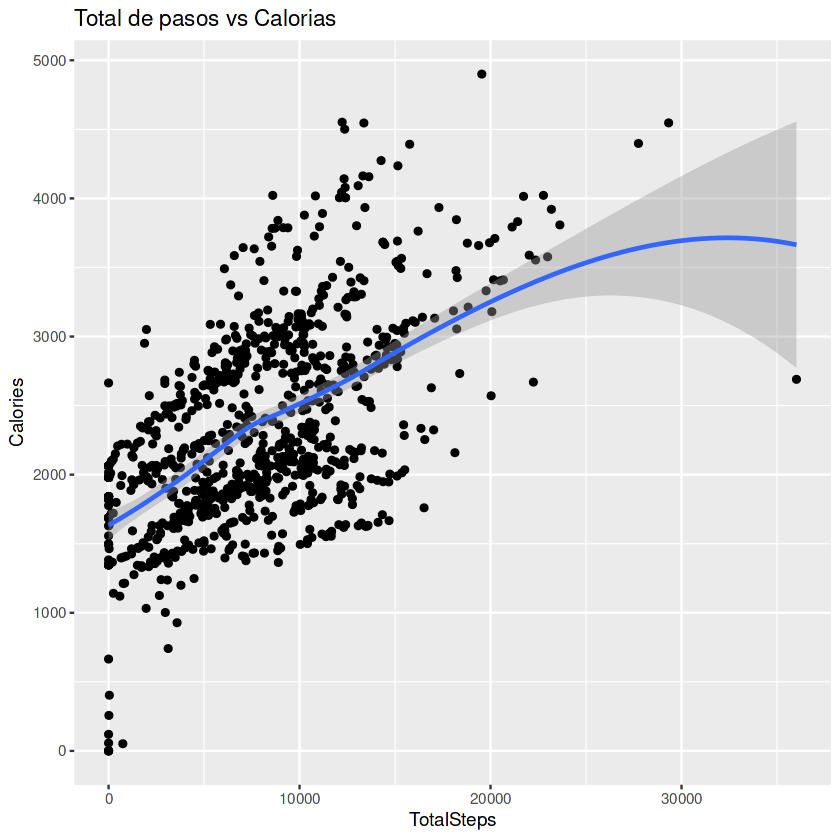

In [15]:
# Total steps vs Calories 
ggplot(data=merged_table, aes(x=TotalSteps, y=Calories)) + 
  geom_point() + geom_smooth() + labs(title="Total de pasos vs Calorias")

Warning message in geom_histogram(stat = "identity", fill = "blue"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


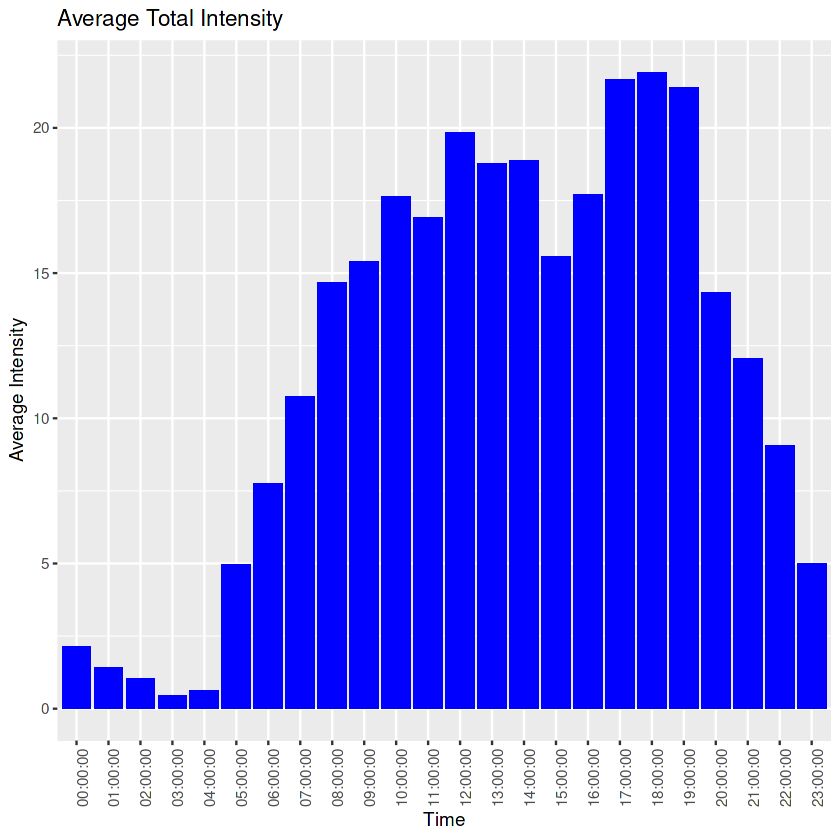

In [16]:
#Hourly intensity
intensities_hours <- hourly_intensities %>%
  group_by(time) %>%
  summarise(mean_intensities_hours = mean(TotalIntensity))

ggplot(data=intensities_hours, aes(x=time, y=mean_intensities_hours)) + geom_histogram(stat = "identity", fill='blue') +
  theme(axis.text.x = element_text(angle = 90)) +
  labs(x = "Time",
       y = "Average Intensity",
       title="Average Total Intensity")

# Conclusion and next steps  <a class="anchor"  id="titulo5"></a>

1. Hay que **motivar a los usuarios a caminar más**, ya que la mayoria no han dado los pasos diarios que se deberían dar para tener una vida saludable. Como es posible que muchos usuarios desconozcan el número de pasos recomendados al día, la aplicación podría marcar una meta diaria de dar los 10000 pasos diarios y, cuando se llegue a estos pasos, mandar una notificación de "Meta diaria conseguida" para hacer que los usuarios se sientan motivados de conseguir esta meta diaria. Además, cuando esté a punto de finalizar el día y los usuarios aun no hayan conseguido su meta, se debería mandar tambien notificaciones avisando de este hecho y alertando de los beneficios de dar más de 10000 pasos diarios.
 
2. Hemos visto que el tiempo de sedentarismo es muy grande, se deberia **motivar a los usuarios a ser más activos**. Se puede proponer actividades en las que se pueda hacer deporte de forma divertida, como realizar bailes, pilates o similares.

3. Hemos visto que las **horas en las que mayor intensidad** hay en el ejercicio es entre las 17:00 y las 19:00. Parece que las horas en las que se elige hacer ejercicio es después de trabajar o estudiar, por ello, se puede proponer actividades para liberar estres cómo yoga o pilates.